[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Propietario\AppData\Local\Temp\ipykernel_4380\893347481.py:95: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Razon']=df['Razon'].str.replace('[^\w\s]','')
C:\Users\Propietario\AppData\Local\Temp\ipykernel_4380\893347481.py:98: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Razon']=df['Razon'].str.replace('\d+','') #\d es para cualquier digito y el + es para uno o más
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


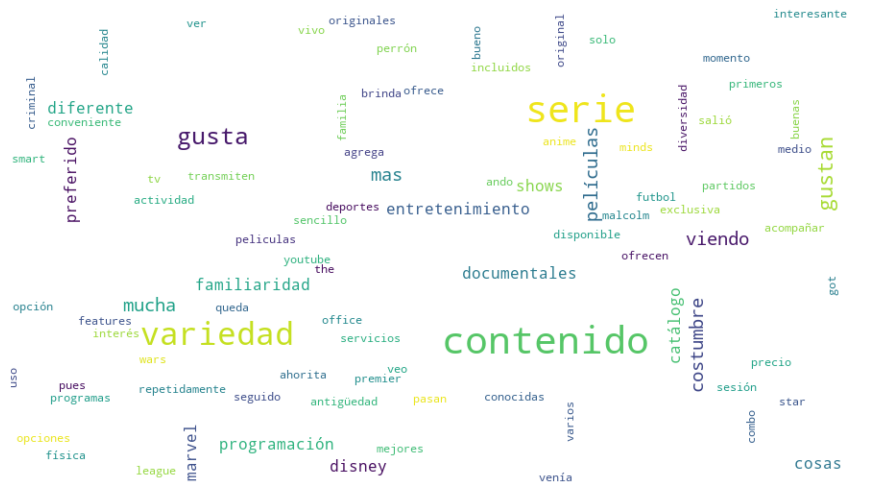

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk 
nltk.download('punkt')
%matplotlib inline

from pymongo import MongoClient
cliente = MongoClient('localhost')

#Conexión a base de datos
 
db = cliente['DBPeriodo1']
#db = cliente.myDB

respuestas = db['Respuestas']
df = pd.DataFrame(list(respuestas.find({})))

n = 10

while (n != 0):
    n = int(input('''                   Bienvenido al analizador de datos de Ingenia Labs.
                                    ---------------------------------------------------
                 Menu:
                 1) - Si deseas saber cuál es el servicio más vendido
                 2) - Si deseas saber cuál es el gasto mensual promedio que realiza una persona
                 3) - Si deseas saber cuáles son las principales razones por la cual los servicio son contratados, a base de 
                      las palabras más repetidas en la encuesta.
                 4) - Si deseas saber cuál es el servicio de streaming favorito
                 5) - Si deseas saber ¿qué porcentaje de personas tienen más de 1 servicio contratado?
                 6) - Si deseas saber cuáles son las combinaciones de servicios contratados más comunes
                 
                 Si desea finalizar el programa, teclee 0
                 
                 Opcion: '''))
    if n == 1:
        #Obtenemos servicio de streaming mas repetido en las contrataciones
        def popular(lista,rep):
            for combinacion in lista:
                servicios = combinacion.split(', ')
                #print(servicios)
                for i in servicios:
                    rep.append(i)
            return rep
        #limpieza de ingresos de respuestas
        lista = df['Lista de servicios']
        rep = []


        rep = popular(lista,rep)
            
        #print(stream)
        res = {i:rep.count(i) for i in rep}
        #print(res)

        servicio = (res.keys())
        values = (res.values())
        fig = plt.figure(figsize = (10, 5))
        
        plt.bar(servicio, values, color ='maroon',
                width = 0.8)

        plt.xlabel("Servicios de Streaming")
        plt.ylabel("Cantidad de repeticiones")
    if n == 2:
        df['Pago Mensual'].mean()

#-------------------------------------------------------------------

# # Gráfico de dispersion
# #definimos figura
# fig, ax=plt.subplots(figsize =(9,5))

# #DEFINIMOS x y y
# ax.scatter(df['Pago Mensual'],df['# Servicios'])

# #definimos vista
# ax.set_xlabel(('Pago Mensual'))
# ax.set_ylabel(('# Servicios'))

#-------------------------------------------------------------------

    if n == 3:

        from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

        import matplotlib.pyplot as plt
        %matplotlib inline

        #Cambiamos a mínuscula
        df['Razon']=df['Razon'].str.lower()

        #Eliminar puntación
        df['Razon']=df['Razon'].str.replace('[^\w\s]','')

        #Eliminar números 
        df['Razon']=df['Razon'].str.replace('\d+','') #\d es para cualquier digito y el + es para uno o más

        #Stop Words
        from nltk import word_tokenize
        from nltk.corpus import stopwords
        nltk.download('stopwords')


        # Crea la lista de stopwords
        #stopwords = set(STOPWORDS)

        stopwords = set(stopwords.words('spanish'))

        stopwords.update(["ta",'ahi','falta','demás','creo'])

        all_words = '' 

        #recorrer el ciclo de todos los incidentes y unirlos a un texto, para extraer las palabras más comunes
        for arg in df['Razon']: 

            tokens = arg.split()  
            
            all_words += " ".join(tokens)+" "

        wordcloud = WordCloud(width = 900, height = 500, 
                        background_color ='white', 
                        stopwords=stopwords,
                        #max_words=100,
                        contour_width=3, 
                        contour_color='steelblue',
                        max_font_size=40,
                        min_font_size = 5).generate(all_words)
        
        
        # Graficar la imagen del WordCloud                        
        plt.figure(figsize = (12, 12), facecolor = None) 
        plt.imshow(wordcloud, interpolation='bilinear') 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        
        plt.show()
  

# Revisión de información

# Extracción de Json

In [3]:
from pymongo import MongoClient
cliente = MongoClient('localhost')

In [4]:
#Conexión a base de datos
 
db = cliente['DBPeriodo1']
#db = cliente.myDB

respuestas = db['Respuestas']

In [5]:
df = pd.DataFrame(list(respuestas.find({})))

In [6]:
df

,_id,ID,Marca temporal,Streaming,# Servicios,Lista de servicios,Favorito,Razon,# Dispositivos,Cuenta Compartida,Pago Mensual
0,631649bbccf406d86ed3929e,0,31/8/2022 9:25:22,Sí,2,"Netflix, Amazon Prime",Netflix,Por antigüedad,4,Sí,300
1,631649bbccf406d86ed3929f,1,31/8/2022 12:08:39,Sí,6,"Netflix, Amazon Prime, HBO Max, Disney+, Star+...",HBO Max,pasan partidos de futbol y GoT,4,Sí,600
2,631649bbccf406d86ed392a0,2,31/8/2022 12:08:39,Sí,3,"Amazon Prime, Disney+, Star+",Star+,Venía en combo con Disney +,2,No,350
3,631649bbccf406d86ed392a1,3,31/8/2022 12:09:08,Sí,2,"Netflix, Otro",Otros,Esta perrón youtube,2,Sí,100
4,631649bbccf406d86ed392a2,4,31/8/2022 12:09:35,Sí,5,"Netflix, Amazon Prime, HBO Max, Disney+, Star+",Netflix,Por el contenido original que tiene,2,Sí,500
...,...,...,...,...,...,...,...,...,...,...,...
66,631649bbccf406d86ed392e0,66,31/8/2022 21:52:42,Sí,5,"Netflix, Amazon Prime, HBO Max, Disney+, Otro",HBO Max,Tiene buenas series y documentales,4,Sí,2000
67,631649bbccf406d86ed392e1,67,31/8/2022 22:00:49,Sí,1,Netflix,Netflix,Es sencillo y tiene variedad,3,Sí,200
68,631649bbccf406d86ed392e2,68,1/9/2022 3:16:51,Sí,3,"Netflix, HBO Max, Disney+",Netflix,Me gusta mas su contenido,4,Sí,600
69,631649bbccf406d86ed392e3,69,1/9/2022 14:30:02,Sí,1,Netflix,Netflix,Costumbre,2,Sí,149


## Mas de 1 servicio


In [7]:
mas_d_uno = df['# Servicios'][df['# Servicios']>1].count()
total = df['ID'].count()

porcentaje = round((mas_d_uno/total)*100,2)

print(f'{porcentaje}%')

83.1%


## Mayor combinacion de servicios

In [8]:
df1 = df.groupby('Lista de servicios')['Lista de servicios'].count()
maxim = df.groupby('Lista de servicios')['Lista de servicios'].count().max()

dicc = dict(df1.where(df.groupby('Lista de servicios')['Lista de servicios'].count() == maxim).dropna())

print(pd.Series(dicc))


Netflix                  9.0
Netflix, Amazon Prime    9.0
dtype: float64


## Obtenemos servicio favorito

Favorito
Amazon Prime     4
Disney+          6
HBO Max          8
Netflix         42
Ninguno          2
Otros            5
Paramount        1
Star+            3
Name: Favorito, dtype: int64


Text(0, 0.5, 'Cantidad de repeticiones')

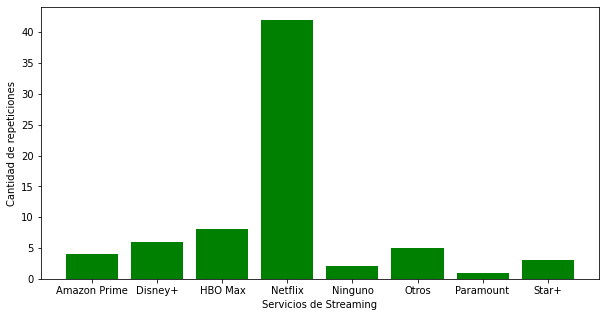

In [9]:
#print(df['Favorito'])
#favs = df['Favorito']
df1 = df.groupby(['Favorito'])['Favorito'].count()
print(df1)

llaves = df1.keys()
vals = df1.to_numpy()

fig = plt.figure(figsize = (10, 5))
        
plt.bar(llaves, vals, color ='green',
                width = 0.8)
plt.xlabel("Servicios de Streaming")
plt.ylabel("Cantidad de repeticiones")

In [10]:
# Verificamos datos nulos
df.isna().sum()

_id                   0
ID                    0
Marca temporal        0
Streaming             0
# Servicios           0
Lista de servicios    0
Favorito              0
Razon                 0
# Dispositivos        0
Cuenta Compartida     0
Pago Mensual          0
dtype: int64

{'Netflix': 66, 'Amazon Prime': 42, 'HBO Max': 35, 'Disney+': 42, 'Star+': 14, 'Paramount': 4, 'Otro': 15}


Text(0, 0.5, 'Cantidad de repeticiones')

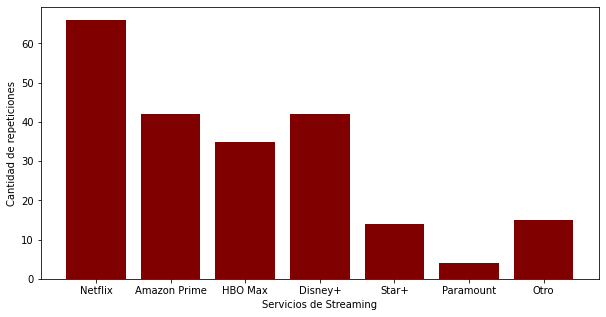

In [20]:
#Obtenemos servicio de streaming mas repetido en las contrataciones
def popular(list,rep):
    for combinacion in list:
        servicios = combinacion.split(', ')
        #print(servicios)
        for i in servicios:
            #print(i)
            rep.append(i)
    return rep

#limpieza de ingresos de respuestas
list = df['Lista de servicios']
rep = []

rep = popular(list,rep)

#print(stream)
res = {i:rep.count(i) for i in rep} # conteo de servicios

print(res)
servicio = (res.keys())
values = (res.values())
fig = plt.figure(figsize = (10, 5))
        
plt.bar(servicio, values, color ='maroon',
width = 0.8)

plt.xlabel("Servicios de Streaming")
plt.ylabel("Cantidad de repeticiones")

In [12]:
df['Pago Mensual'].mean()

409.9577464788732

Text(0, 0.5, '# Servicios')

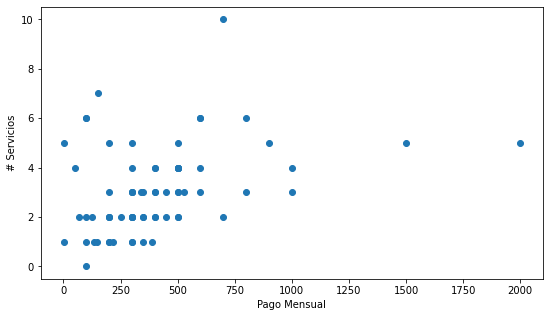

In [13]:
# Gráfico de dispersion
#definimos figura
fig, ax=plt.subplots(figsize =(9,5))

#DEFINIMOS x y y
ax.scatter(df['Pago Mensual'],df['# Servicios'])

#definimos vista
ax.set_xlabel(('Pago Mensual'))
ax.set_ylabel(('# Servicios'))

c:\Users\Propietario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pago Mensual'>

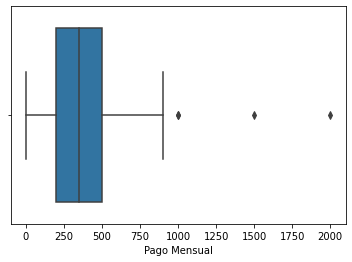

In [14]:
import seaborn as sns

import seaborn as sns
sns.boxplot(df['Pago Mensual'])

C:\Users\Propietario\AppData\Local\Temp\ipykernel_4380\3105606134.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Razon']=df['Razon'].str.replace('[^\w\s]','')
C:\Users\Propietario\AppData\Local\Temp\ipykernel_4380\3105606134.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Razon']=df['Razon'].str.replace('\d+','') #\d es para cualquier digito y el + es para uno o más
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


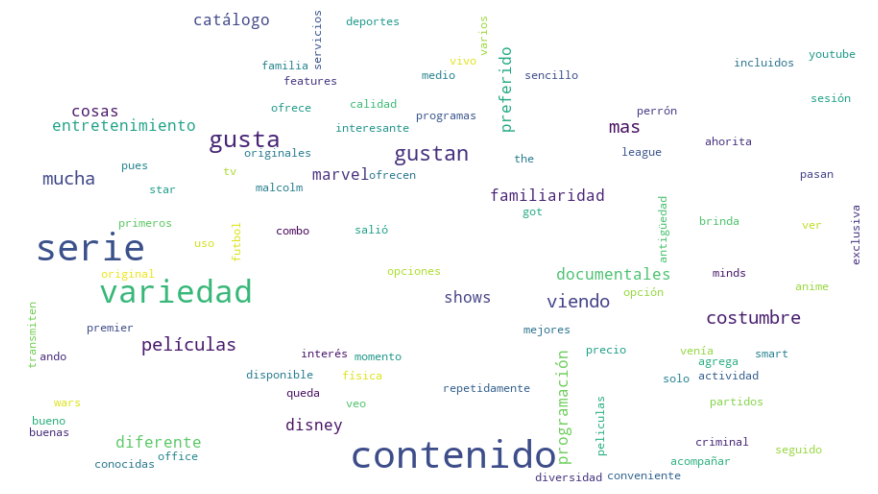

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#Cambiamos a mínuscula
df['Razon']=df['Razon'].str.lower()

#Eliminar puntación
df['Razon']=df['Razon'].str.replace('[^\w\s]','')

#Eliminar números 
df['Razon']=df['Razon'].str.replace('\d+','') #\d es para cualquier digito y el + es para uno o más

#Stop Words
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')


# Crea la lista de stopwords
#stopwords = set(STOPWORDS)

stopwords = set(stopwords.words('spanish'))

stopwords.update(["ta",'ahi','falta','demás','creo'])

all_words = '' 

#recorrer el ciclo de todos los incidentes y unirlos a un texto, para extraer las palabras más comunes
for arg in df['Razon']: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white', 
                stopwords=stopwords,
                #max_words=100,
                contour_width=3, 
                contour_color='steelblue',
                max_font_size=40,
                min_font_size = 5).generate(all_words)
 
  
# Graficar la imagen del WordCloud                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()